In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from sympy import * 
from tensorflow import keras 

In [2]:
# Prediction from Univariate Sequential Data ( only feature is Time )

seq = [ 10 , 30 , 50 , 70 , 90 , 110 , 130 ]

seq1  = np.array(seq)

seq = (seq - seq1.mean() )/ seq1.std()

# Decide time step( at a time , len of inp se to LSTM e,g no of words in sentence )
t_steps = 3 
n_features = 1  # (Univariate , endogenous , static )

# MAke training data from given raw (unprocessed) seq 

def inp_seq( seq , t_steps ):
    X= [] 
    Y= []
    for i in range( len(seq) ):
        end_i = i + t_steps 

        if( end_i > len(seq)-1) :
            break
        # take from i to t_steps as X and just after as target var 
        x, y = seq[i:end_i] , seq[end_i]
        X.append(x)
        Y.append(y)
    return np.array(X) , np.array(Y) 

X, y = inp_seq ( seq , t_steps )

# actual INP to LSTM or RNN or GRU are ( no of samples total ( no of rows ),t_steps (no. of cols ), inp_features )
X = X.reshape ( ( X.shape[0] , X.shape[1] ,1  ) ) 


# Now ,a t 1 instant , we pass 1 seq of info .( ie 1 instance of size =3 ) [10 , 20 , 30] and trian the lSTM on it with y = 40 



In [3]:
# Harness the Model 
# units in LSTM - dim of output neurons / dim  of ht (hidden state) /cell stae*ct - LTM )

ts_model = keras.models.Sequential([

   # 1 hidden layer of LSTM   with out dim of ht as = 50 units 
   # USe relu actiavtion snce tanh already sued in LSTM to detemine LTM and STM and  input_shape== (t_steps , no of features )
   keras.layers.LSTM( 50 , activation = "relu" ,  input_shape= (t_steps , n_features ) ) ,

   # FOr final prdictin and processing , use a FUlly CONECTED LAYER ( FCN )
   keras.layers.Dense(1 ) # regression , ONLY 1 output neuron ( with no act ivation )

])

ts_model.compile (loss = "mse" , optimizer = "sgd" , metrics = "mse")


In [4]:
# keep epichs higher wile trianing the LSTM 
history = ts_model.fit( X , y , epochs = 100) 

# sgd is becoming non differntible (part_dev(Loss) / part_dev(w) == 0)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.8941 - mse: 0.8941
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8657 - mse: 0.8657
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.8380 - mse: 0.8380
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8117 - mse: 0.8117
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 0.7864 - mse: 0.7864
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.7622 - mse: 0.7622
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7390 - mse: 0.7390
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.7169 - mse: 0.7169
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6956 - mse: 0.6956
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6753 - mse: 0.6753
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6558 -

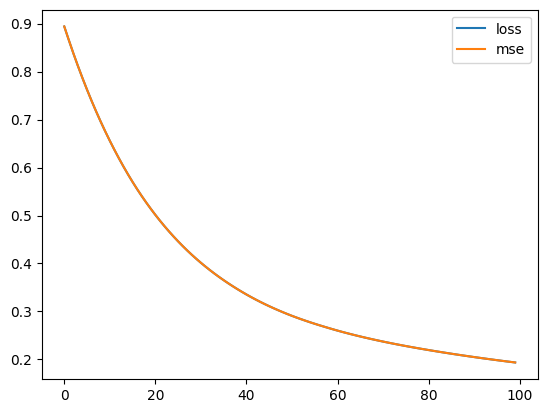

In [5]:
pd.DataFrame( history.history).plot()
plt.show()

In [7]:
# New smaple data for prediction 


''' If MSE > INT_MAX , use Scaling to transform the data '''
X1 = np.array([ 90 , 110 , 130 ])
mu = X1.mean() 
std_ = X1.std()

X1 = ( X1 - mu ) /  std_
X1 = X1.reshape( (1 , 3 , 1 ) )
X1

num = ts_model.predict(X1 ) 
num = num*std_ + mu 
num

1/1 [==============================] - 0s 281ms/step


array([[122.81839]], dtype=float32)